In [ ]:
import sys  
sys.path.insert(0, '/content/drive/MyDrive/overoptimism')

In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_blobs, make_moons, make_circles, load_iris, load_wine, load_breast_cancer, load_digits, fetch_covtype    
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering, MeanShift, estimate_bandwidth
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_mutual_info_score as AMI
from sklearn.metrics import adjusted_rand_score as ARI
from rock import ROCK

import matplotlib.pyplot as plt

import logging
import sys
from tqdm.notebook import tqdm

ModuleNotFoundError: ignored

In [13]:
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.left'] = False

In [ ]:
experiment = []
run_id = 0

In [ ]:
def getBlobDensities(n_centers):
  return np.round([3/n_centers * x for x in range(1, n_centers + 1)], decimals=2)

In [ ]:
blobs = make_blobs(n_samples=800, n_features=3, cluster_std=getBlobDensities(2), centers=2, random_state=42)
moons = make_moons(n_samples=1000, noise=0.15, random_state=42)
circles = make_circles(n_samples=1600, noise=0.02, random_state=42)
iris = load_iris(return_X_y=True)
wine = load_wine(return_X_y=True)
cancer = load_breast_cancer(return_X_y=True)
digits = load_digits(return_X_y=True)

In [ ]:
print(ARI(KMeans(n_clusters=4).fit(blobs[0]).labels_, blobs[1]))
print(AMI(KMeans(n_clusters=10).fit(moons[0]).labels_, moons[1]))
print(AMI(KMeans(n_clusters=3).fit(circles[0]).labels_, circles[1]))
print(ARI(KMeans(n_clusters=4).fit(iris[0]).labels_, iris[1]))
print(AMI(KMeans(n_clusters=10).fit(digits[0]).labels_, digits[1]))
print(AMI(KMeans(n_clusters=3).fit(wine[0]).labels_, wine[1]))

0.6674518669777725
0.41974284387002725
-0.0006950776802082118
0.6498176853819967
0.7389739169509073
0.4226866642766124


In [16]:
#datasets = [blobs, moons, circles, iris, wine, cancer, digits]
data_names = ['Blobs', 'Moons', 'Circles', 'Iris', 'Wine', 'Breast Cancer', 'Digits']
tmaxs = range(0, 30)
n_samples = 1000
jitter = 0.15

In [17]:
for d in tqdm(range(0, len(datasets))):
    for t in tqdm(range(0, len(tmaxs))):
      dataset = datasets[d]
      run = {}
      scaler = StandardScaler()
      data = scaler.fit_transform(dataset[0])
      data = dataset[0]
      rock = ROCK(tmax=tmaxs[t]).fit(data).labels_
      run['Dataset'] = data_names[d]
      gt = dataset[1]
      run['AMI'] = AMI(rock, gt)
      run['ARI'] = ARI(rock, gt)
      run['tmax'] = tmaxs[t]
      
      experiment.append(run)

NameError: ignored

In [1]:
import pandas as pd
results = pd.read_csv('/content/drive/MyDrive/overoptimism/results/ROCK_hyper.csv')

In [ ]:
results = pd.DataFrame(experiment)

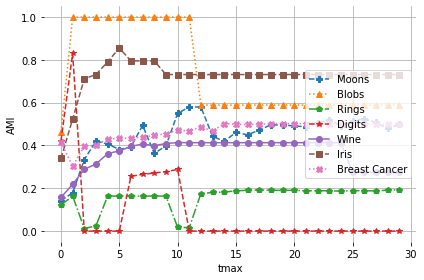

In [15]:
import matplotlib.pyplot as plt

plt.plot(tmaxs, results[results['Dataset'] == 'Moons']['AMI'], linestyle='--', marker='P', label='Moons')
plt.plot(tmaxs, results[results['Dataset'] == 'Blobs']['AMI'], linestyle=":", marker='^', label='Blobs')
plt.plot(tmaxs, results[results['Dataset'] == 'Circles']['AMI'], linestyle='-.', marker='p', label='Rings')
plt.plot(tmaxs, results[results['Dataset'] == 'Digits']['AMI'], linestyle='--', marker='*',  label='Digits')
plt.plot(tmaxs, results[results['Dataset'] == 'Wine']['AMI'], linestyle='-', marker='o', label='Wine')
plt.plot(tmaxs, results[results['Dataset'] == 'Iris']['AMI'], linestyle='--', marker='s', label='Iris')
plt.plot(tmaxs, results[results['Dataset'] == 'Breast Cancer']['AMI'], linestyle=':', marker='X', label='Breast Cancer')
plt.xlabel('tmax')
plt.ylabel('AMI')
plt.tight_layout()
plt.legend(loc='right')
plt.savefig('ROCK_hyper_search.png')


In [ ]:
results.to_csv('ROCK_hyper.csv')